In [1]:
# We load the data

import numpy as np

In [2]:
X = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')

In [3]:
# We randomly permute the data

permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

In [4]:
# We plot the data

import matplotlib.pyplot as plt

In [5]:
##
# Function that plots the points in 2D together with their labels
#
# Inputs:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: 2D matrices with the x and y coordinates of the points shown in the plot
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

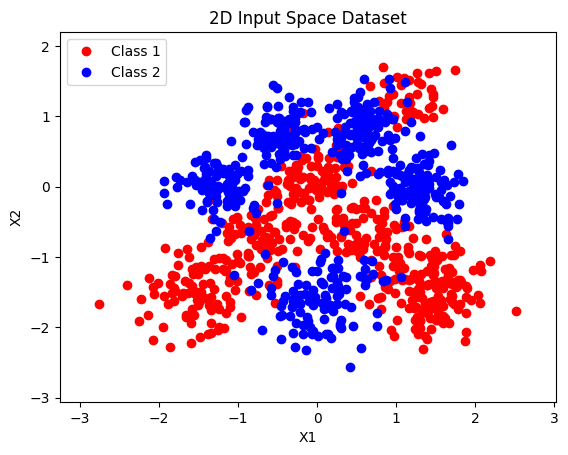

In [6]:
##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y, title):
    xx, yy = plot_data_internal(X, y)
    plt.title(title)
    plt.show()

plot_data(X, y, title='2D Input Space Dataset')

In [7]:
# We split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]

In [8]:
# The logistic function

def logistic(x): return 1.0 / (1.0 + np.exp(-x))


In [9]:
##
# Function that makes predictions with a logistic classifier
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# w: vector of model parameters
#
# Output: The predictions of the logistic classifier
#

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))


In [10]:
##
# Function that computes the average loglikelihood of the logistic classifier on some data.
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# y: vector of binary output labels 
# w: vector of model parameters
#
# Output: The average loglikelihood
#
def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))


In [11]:
##
# Function that expands a matrix of input features by adding a column equal to 1.
#
# Input:
#
# X: matrix of input features.
#
# Output: Matrix x_tilde with one additional constant column equal to 1 added.
#
def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)


In [12]:
##
# Function that finds the model parameters by optimising the likelihood using gradient descent
#
# Input:
#
# X_tile_train: matrix of training input features (with a constant 1 appended to the left) 
# y_train: vector of training binary output labels 
# X_tile_test: matrix of test input features (with a constant 1 appended to the left) 
# y_test: vector of test binary output labels 
# alpha: step_size_parameter for the gradient based optimisation
# n_steps: the number of steps of gradient based optimisation
#
# Output: 
# 
# 1 - Vector of model parameters w 
# 2 - Vector with average log-likelihood values obtained on the training set
# 3 - Vector with average log-likelihood values obtained on the test set
#
def fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha):
    w = np.random.randn(X_tilde_train.shape[ 1 ])
    ll_train = np.zeros(n_steps)
    ll_test = np.zeros(n_steps)
    for i in range(n_steps):
        sigmoid_value = predict(X_tilde_train, w)

        gradient = X_tilde_train.T @ (y_train - sigmoid_value)

        w = w + alpha * gradient

        ll_train[ i ] = compute_average_ll(X_tilde_train, y_train, w)
        ll_test[ i ] = compute_average_ll(X_tilde_test, y_test, w)
        print(ll_train[ i ], ll_test[ i ])

    return w, ll_train, ll_test

In [31]:
# We train the classifier

alpha = 0.001
n_steps = 200

X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)
w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-1.0153210191983528 -0.9002200371991875
-0.8910073907479737 -0.7942154539904986
-0.7988178427204978 -0.7216208356496998
-0.734602756080474 -0.6753762173382464
-0.6925490026776554 -0.6480984889817304
-0.6662844682322466 -0.6331375253384863
-0.650293041378358 -0.6254672519636181
-0.6406078974931776 -0.6218307318694852
-0.6346946094001944 -0.6203261339909175
-0.6310288766976464 -0.6199053743428418
-0.6287139922676022 -0.6200074875789328
-0.6272228860155965 -0.6203375479175223
-0.6262427620019583 -0.6207436177059573
-0.6255853369972795 -0.6211502111178997
-0.6251354619836259 -0.6215225307623741
-0.62482155390912 -0.6218471900977424
-0.6245983770975593 -0.6221217796579299
-0.6244368731747416 -0.6223492160007948
-0.6243180655150806 -0.6225347011401547
-0.6242293530640736 -0.6226841171400216
-0.6241622256829301 -0.6228032120343326
-0.624110836985006 -0.6228972204829533
-0.624071101221022 -0.6229707200520134
-0.6240401143959079 -0.6230276114895403
-0.624015778355684 -0.6230711605118429
-0.6239

In [32]:
w.shape

(3,)

In [15]:
##
# Function that plots the average log-likelihood returned by "fit_w"
#
# Input:
#
# ll: vector with log-likelihood values
#
# Output: Nothing
#

def plot_ll(ll, title):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title(title)
    plt.show()

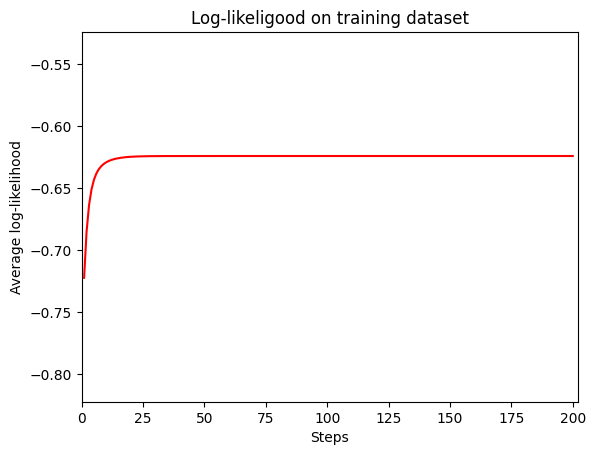

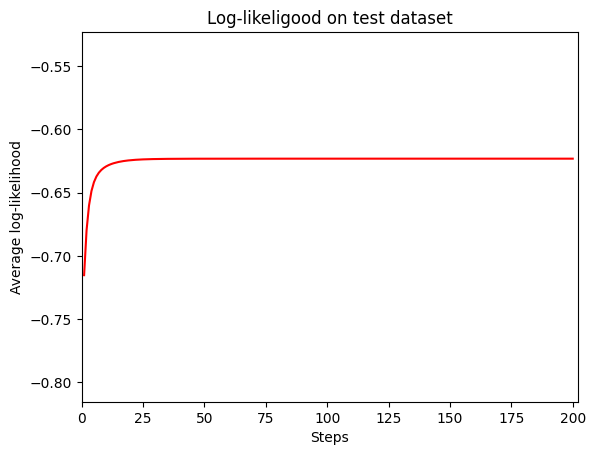

In [16]:
# We plot the training and test log likelihoods

plot_ll(ll_train, title='Log-likeligood on training dataset')
plot_ll(ll_test, title='Log-likeligood on test dataset')

In [17]:
##
# Function that plots the predictive probabilities of the logistic classifier
#
# Input:
#
# X: 2d array with the input features for the data (without adding a constant column with ones at the beginning)
# y: 1d array with the class labels (0 or 1) for the data
# w: parameter vector
# map_inputs: function that expands the original 2D inputs using basis functions.
#
# Output: Nothing.
#

def plot_predictive_distribution(X, y, w, title, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.title(title)
    plt.show()

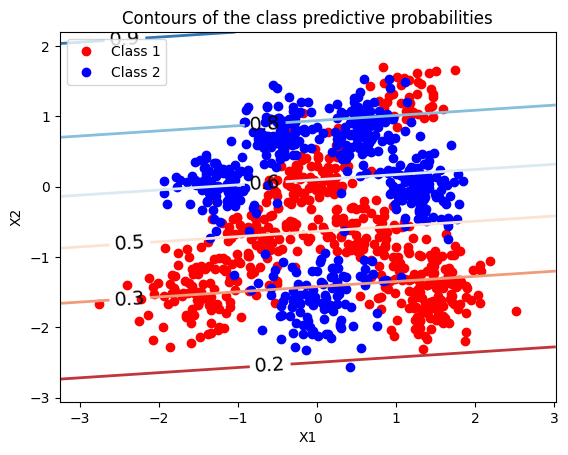

In [18]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w, title='Contours of the class predictive probabilities')

In [19]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix

In [20]:
X_tilde = get_x_tilde(X)
Z = predict(X_tilde, w)

def threshold(ll, thres):
    return np.array([1 if likelihood > thres else 0 for likelihood in ll])

thres = 0.5
ll_thres = threshold(Z, thres)
confusion_matrix(y, ll_thres, normalize="true")

array([[0.70948617, 0.29051383],
       [0.26720648, 0.73279352]])

In [21]:
##
# Function that replaces initial input features by evaluating Gaussian basis functions
# on a grid of points
#
# Inputs:
#
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
#
# Output: Feature matrix with the evaluations of the Gaussian basis functions.
#

def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

In [22]:
# We expand the data

l = 1

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

In [23]:
X_tilde_train.shape

(800, 801)

In [24]:
# We train the new classifier on the feature expanded inputs

alpha = 0.0001
n_steps = 1000

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-6.211574010412001 -6.755877438812165
-5.297505504043977 -5.803679614786774
-4.475683905605781 -4.93700798716094
-3.7526381272764935 -4.165501757554344
-3.1516948954904547 -3.5102148942257987
-2.686515940706871 -2.9879350918985046
-2.337350177723961 -2.5856523049122666
-2.066826252796334 -2.2699856942064436
-1.8527469844507993 -2.0185223937445973
-1.6854538900433291 -1.820099869866533
-1.5571462330961519 -1.666011526089323
-1.4593408634707778 -1.5473053578585803
-1.3839822305739684 -1.4553793213999398
-1.3245094723304407 -1.38294514261197
-1.2760867969369418 -1.3244081326874966
-1.235342115620313 -1.275733596737075
-1.1999834912343574 -1.2341034087049279
-1.168465112110943 -1.1975715635196873
-1.1397429417919116 -1.1647943801593101
-1.1131083875813323 -1.1348393451061112
-1.0880779640240525 -1.1070549042129638
-1.0643203541470903 -1.0809827180904543
-1.0416078687704378 -1.0562983767614103
-1.0197838027031079 -1.032771008551918
-0.9987402376141449 -1.0102354812978982
-0.9784027945568559

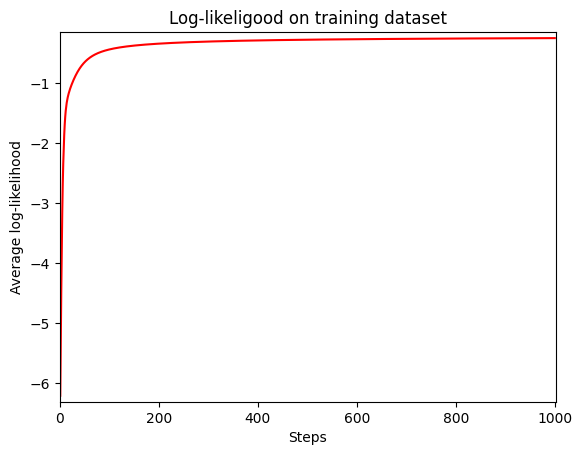

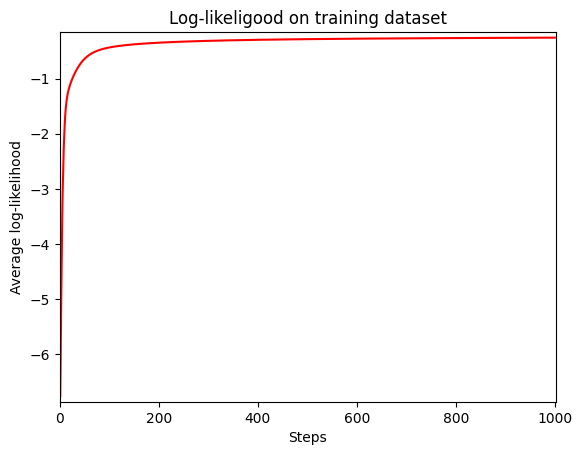

In [25]:
# We plot the training and test log likelihoods

plot_ll(ll_train, title='Log-likeligood on training dataset')
plot_ll(ll_test, title='Log-likeligood on training dataset')

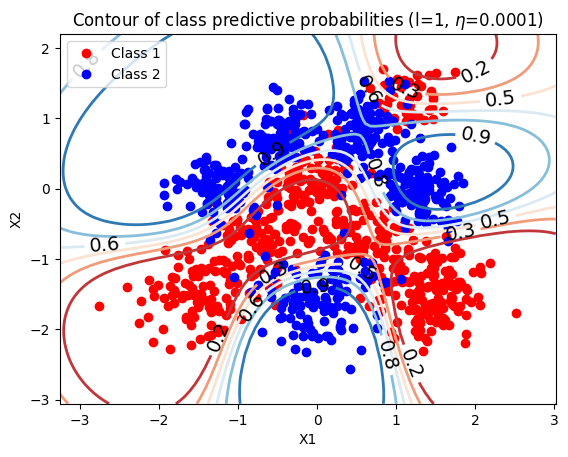

In [26]:
# We plot the predictive distribution

title = 'Contour of class predictive probabilities (l=1, $\eta$=0.0001)'
plot_predictive_distribution(X, y, w, title, lambda x : evaluate_basis_functions(l, x, X_train))

In [27]:
w.shape

(801,)

In [28]:
X_tilde = get_x_tilde(evaluate_basis_functions(l, X, X_train))
Z = predict(X_tilde, w)

def threshold(ll, thres):
    return np.array([1 if likelihood > thres else 0 for likelihood in ll])

thres = 0.5
ll_thres = threshold(Z, thres)
confusion_matrix(y, ll_thres, normalize="true")

array([[0.88932806, 0.11067194],
       [0.07692308, 0.92307692]])